Data Loading

In [173]:
import pandas as pd
data = pd.read_csv('data.csv')

Data Description

In [174]:
print("\nDescription of the dataset:")
print(data.describe())


Description of the dataset:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.

Dropping Erroneous Columns

In [175]:
if 'Unnamed: 32' in data.columns:
    data = data.drop('Unnamed: 32', axis=1)

Checking for NULL Values

In [176]:
print("\nNull values in the dataset:")
print(data.isnull().sum())


Null values in the dataset:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Display the first few rows

In [177]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_w

Data Visualization

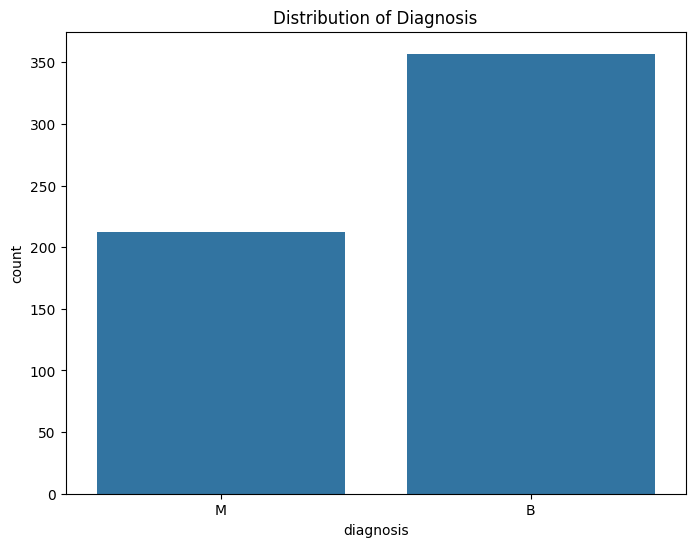

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'diagnosis' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='diagnosis', data=data)
    plt.title('Distribution of Diagnosis')
    plt.show()

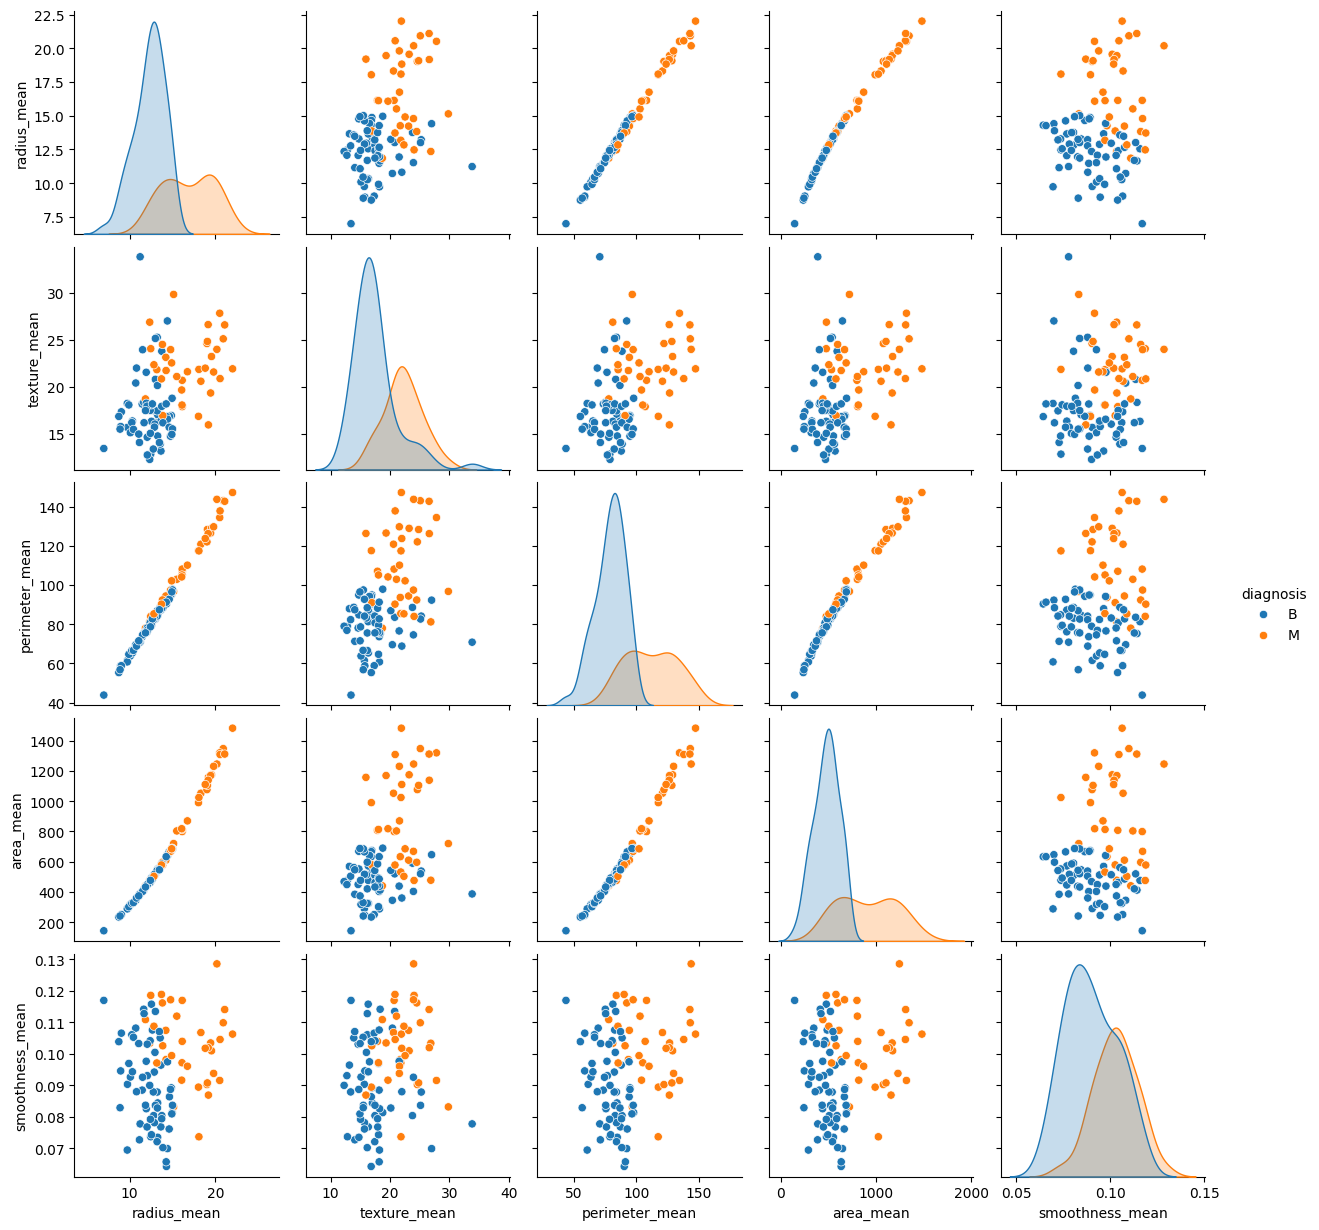

In [179]:
# Visualize pairwise relationships in the dataset (pairplot might be heavy, so using a sample if needed)
sample_data = data.sample(100) if len(data) > 100 else data

# Plotting pairwise relationships for a few features to observe correlations
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(sample_data[features_to_plot], hue='diagnosis')
plt.show()

Correlation Matrix

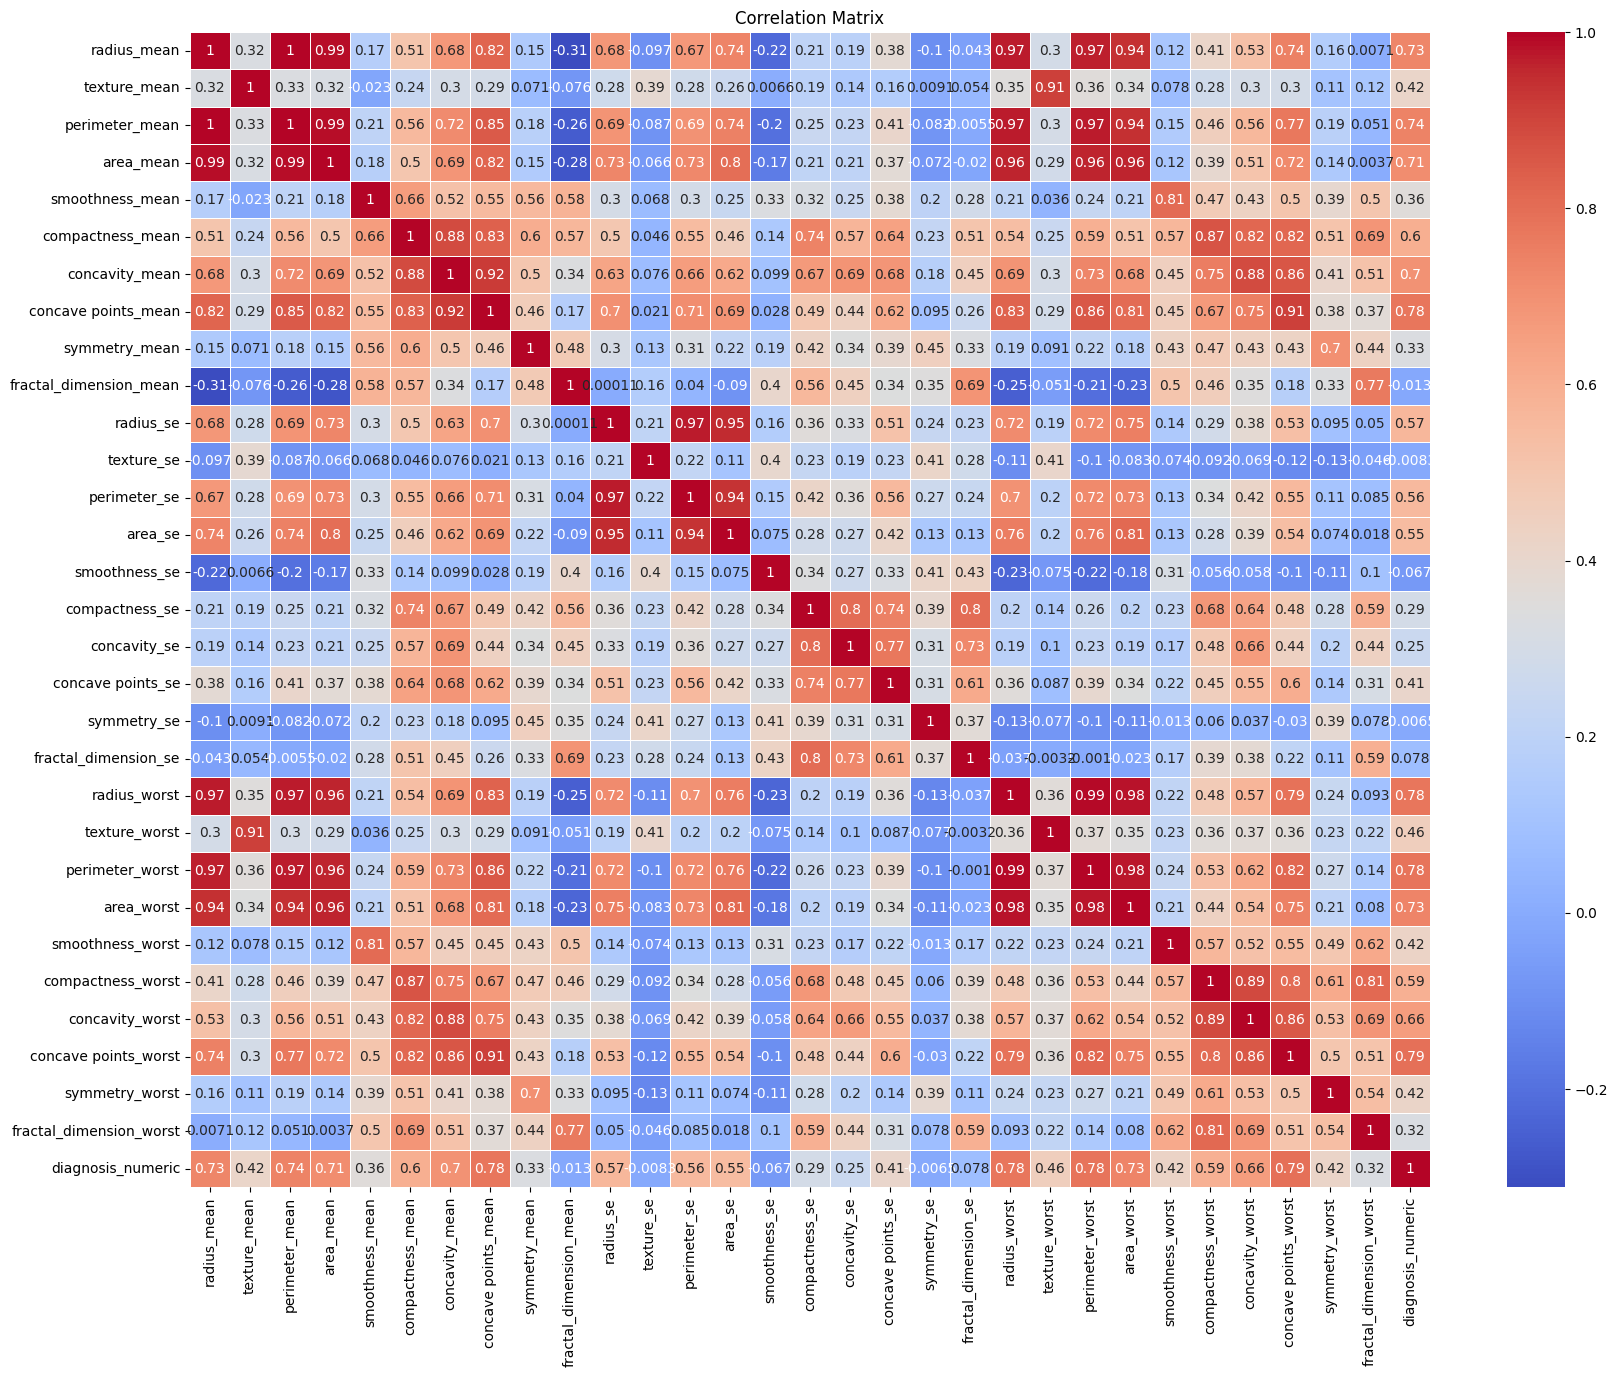

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'diagnosis' to numeric format (optional, for correlation purposes)
data['diagnosis_numeric'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Drop non-numeric columns for correlation calculation
numeric_data = data.drop(['id', 'diagnosis'], axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Boxplots of Features

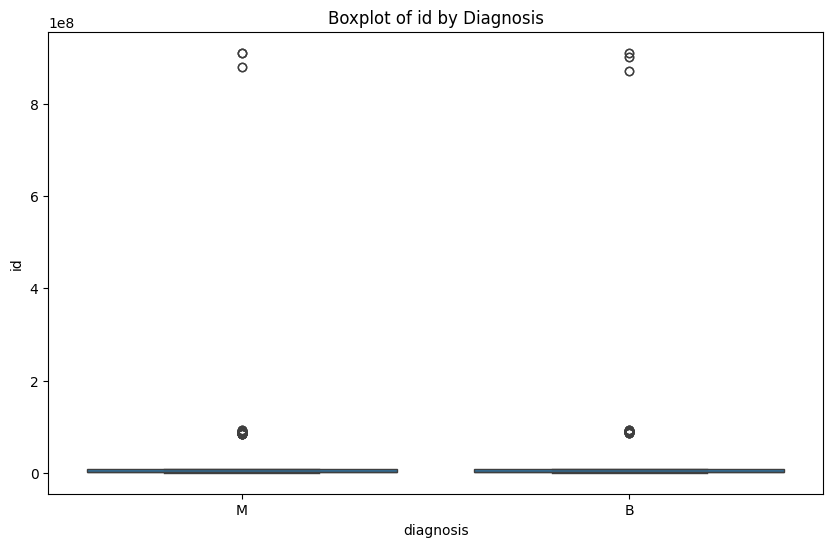

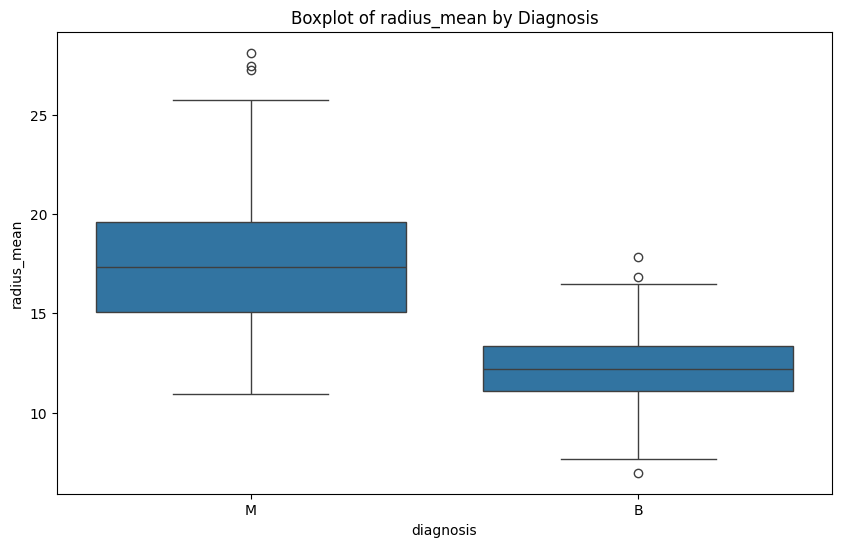

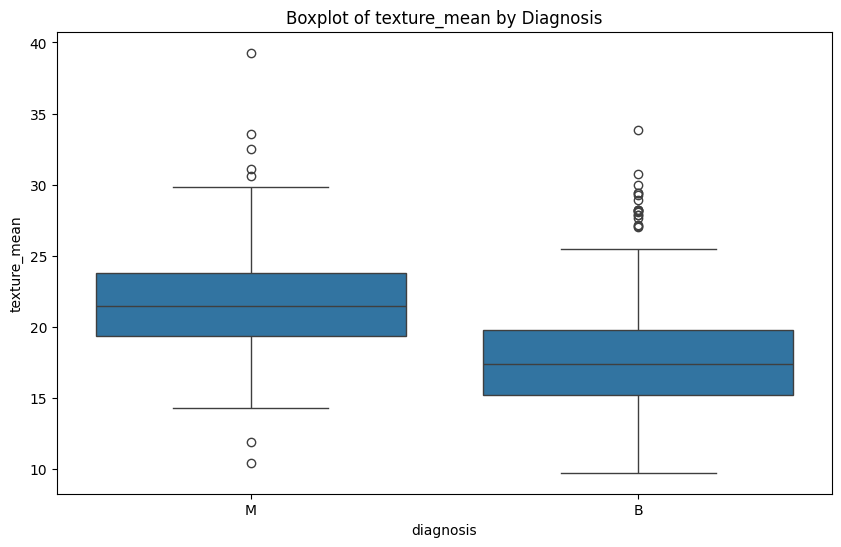

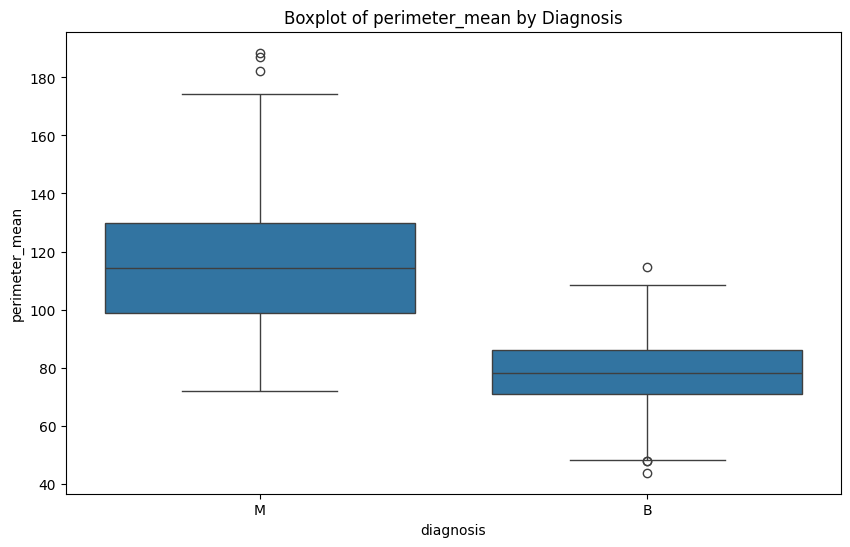

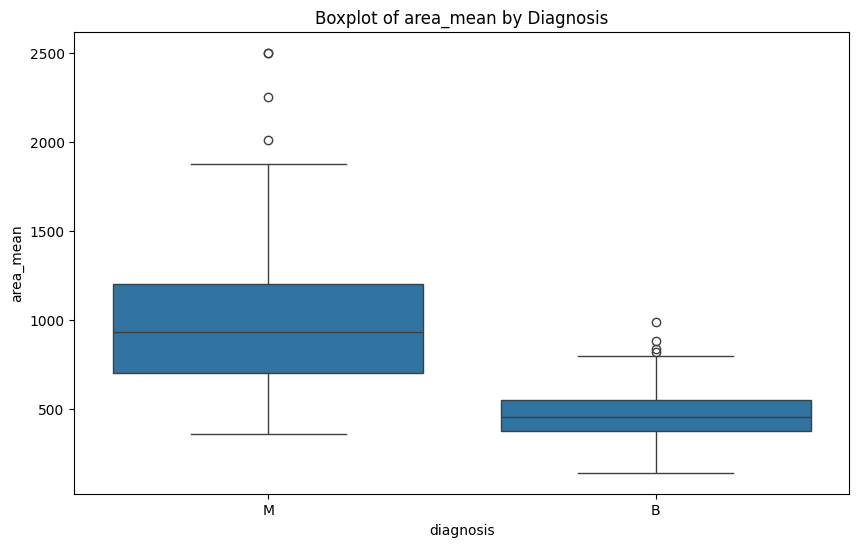

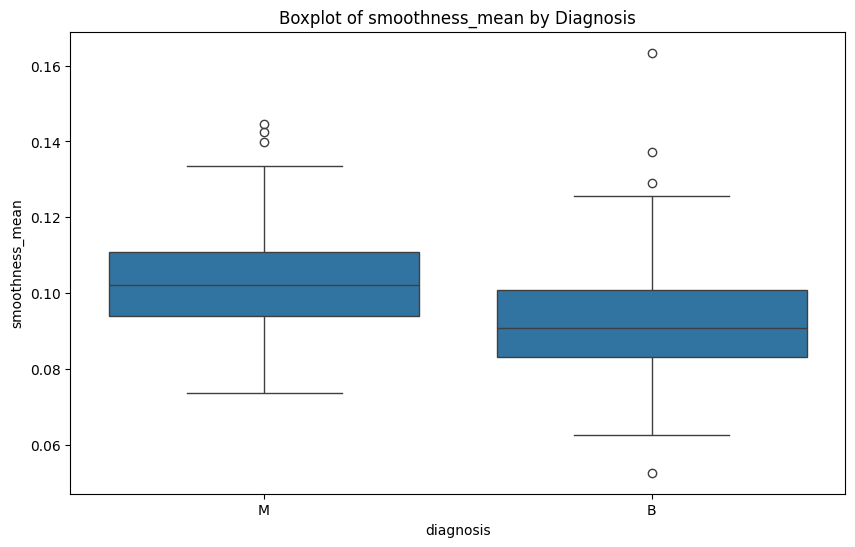

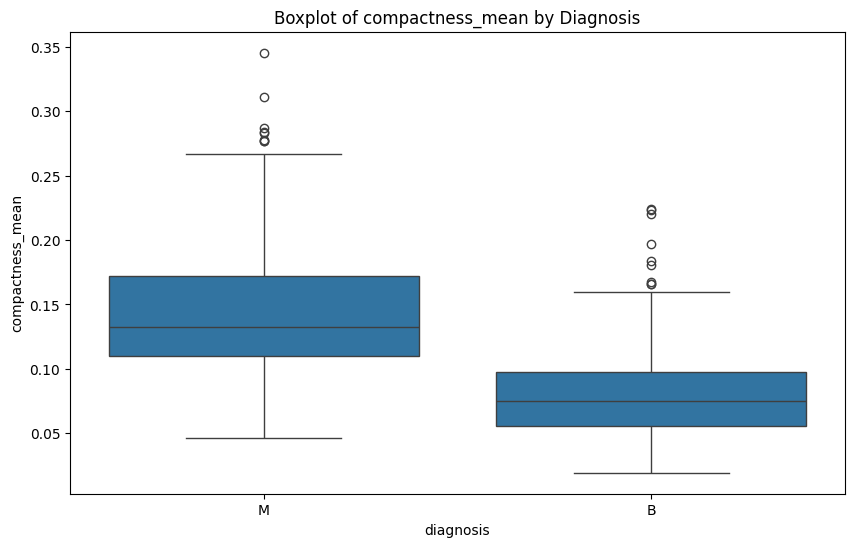

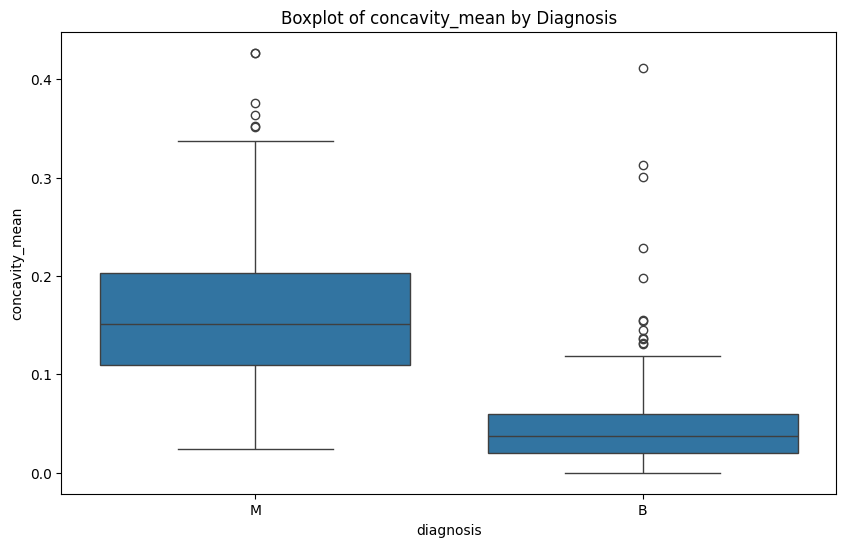

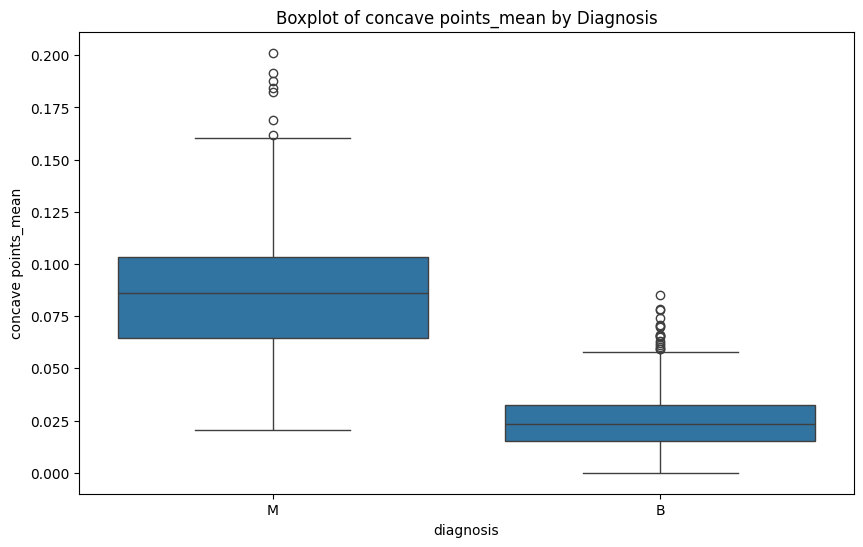

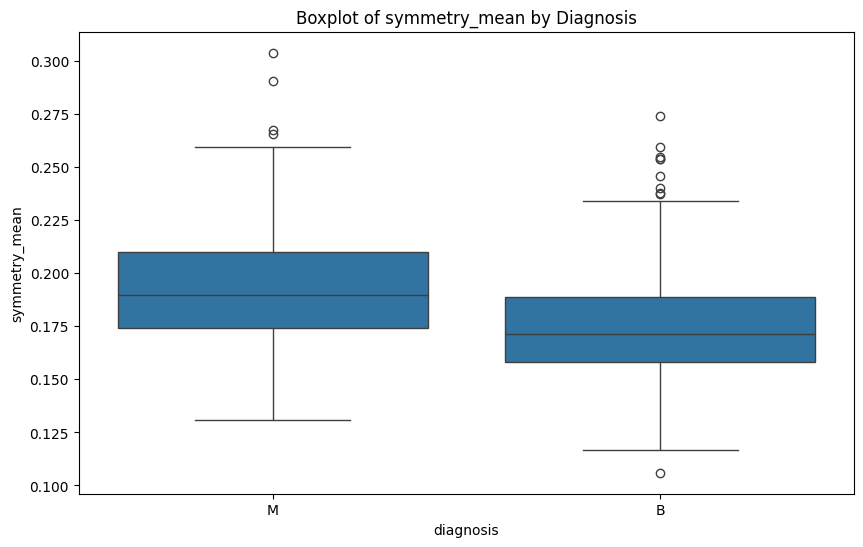

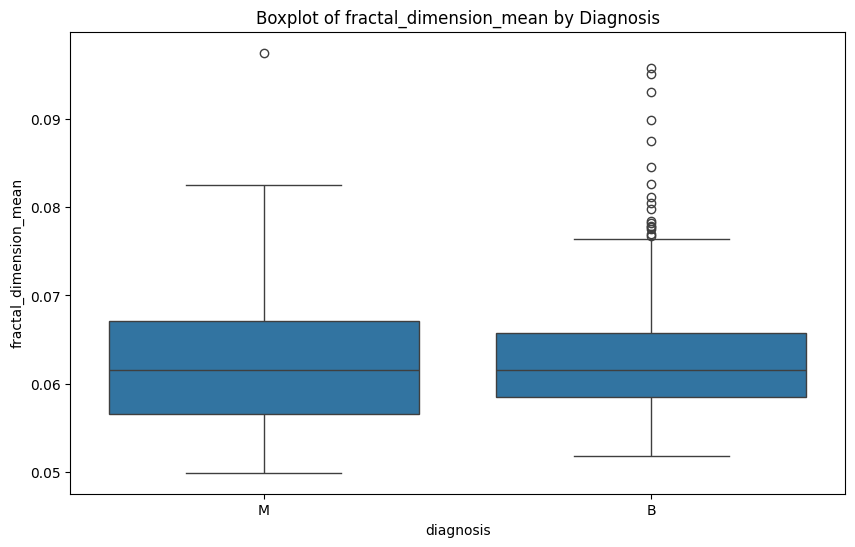

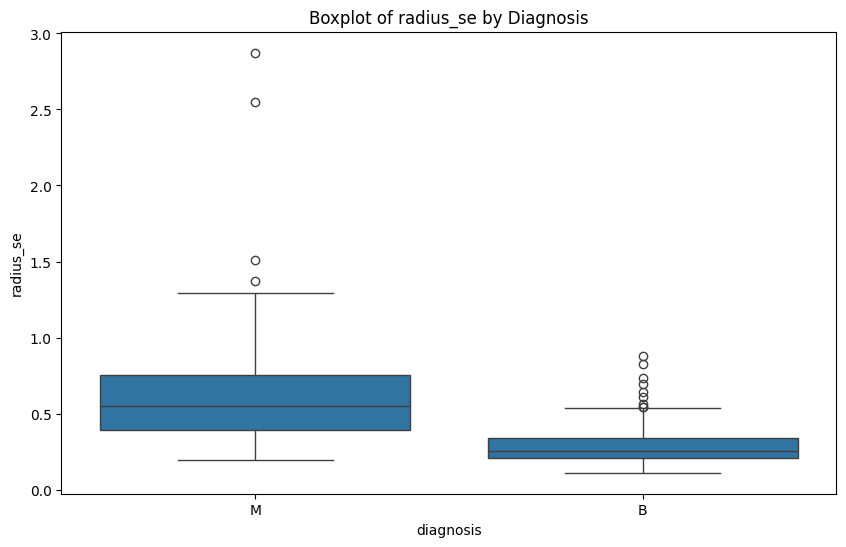

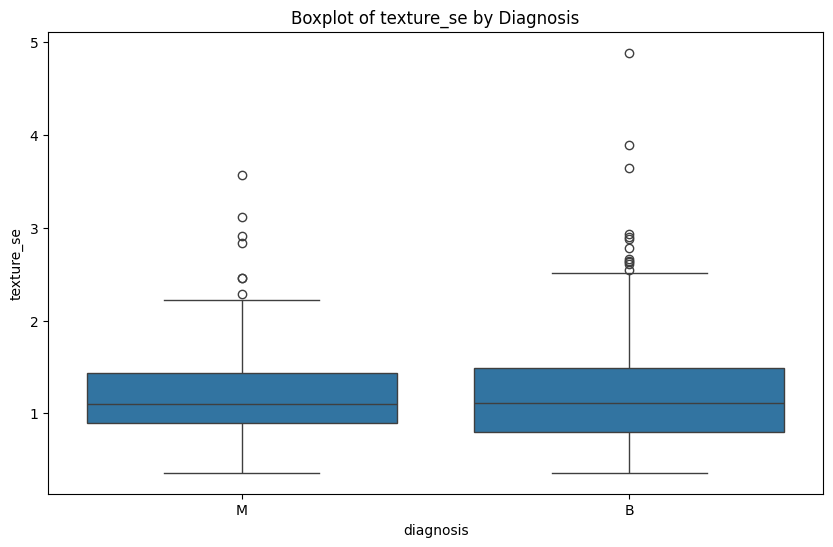

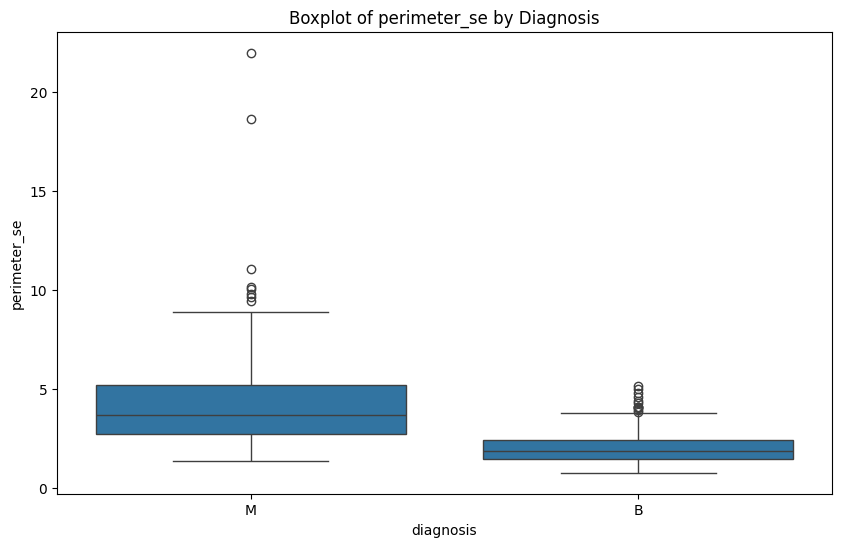

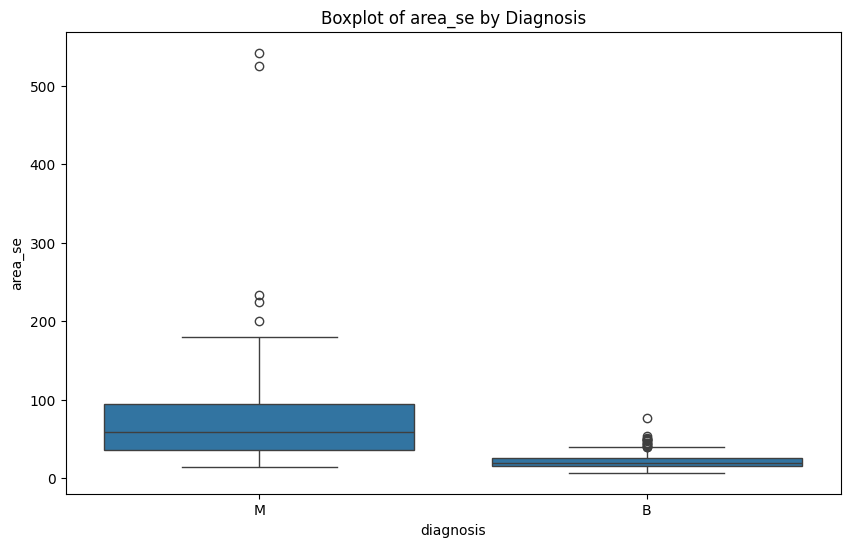

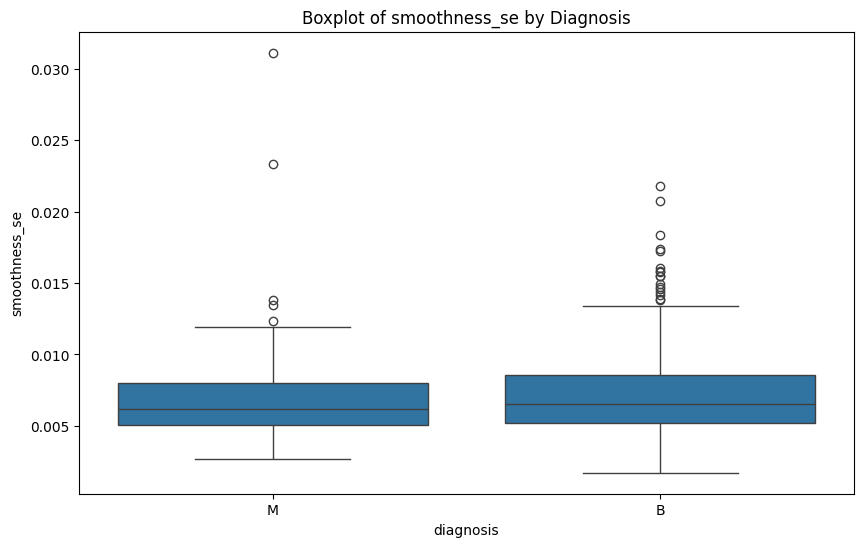

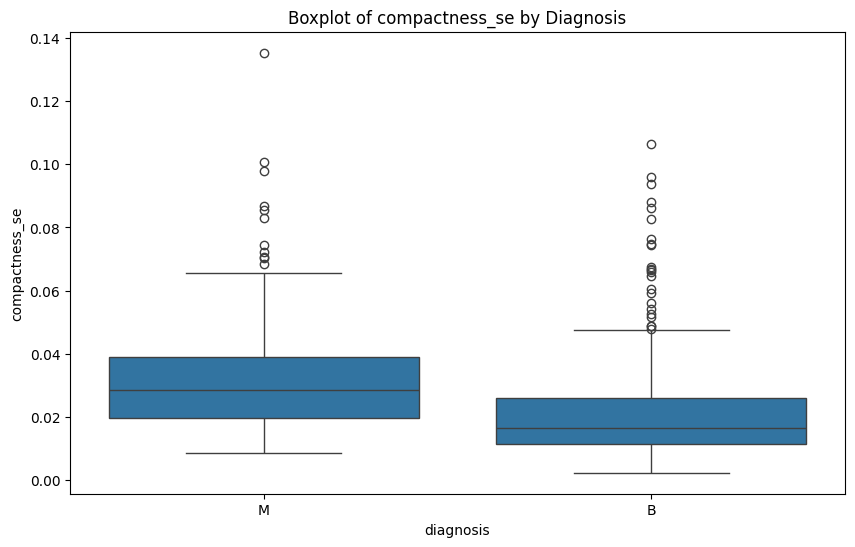

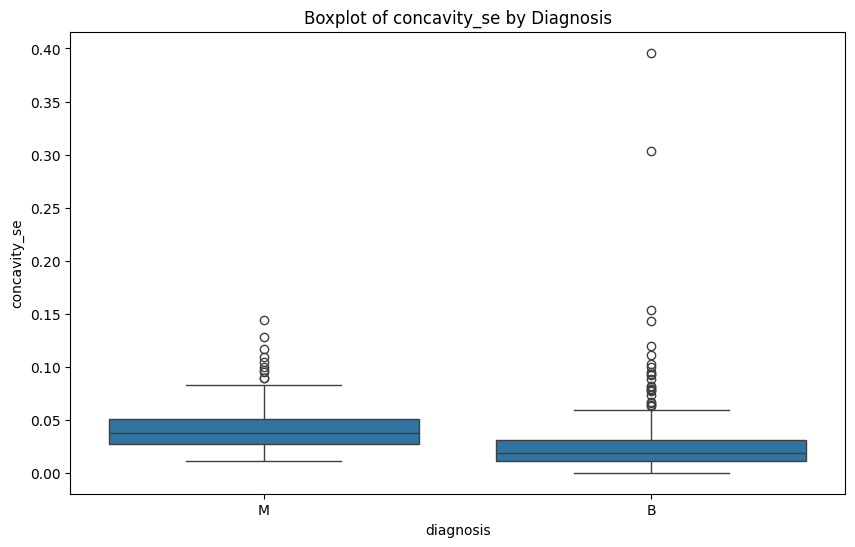

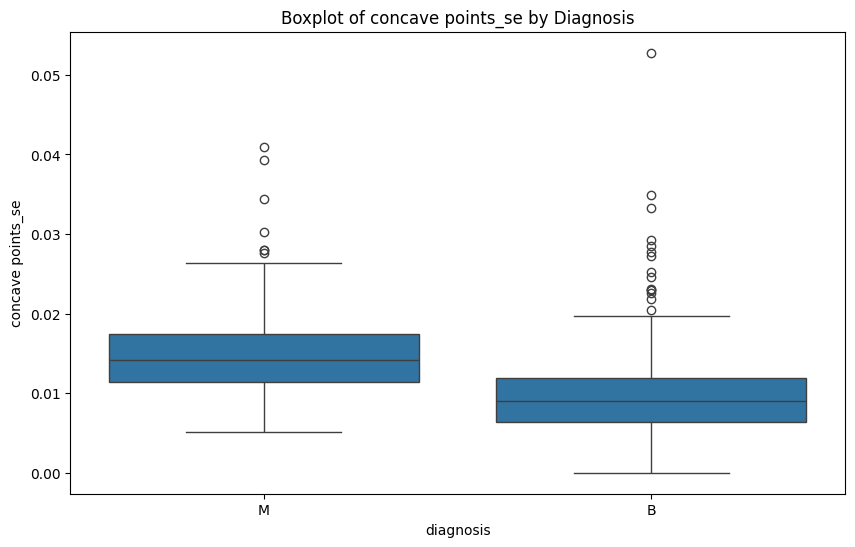

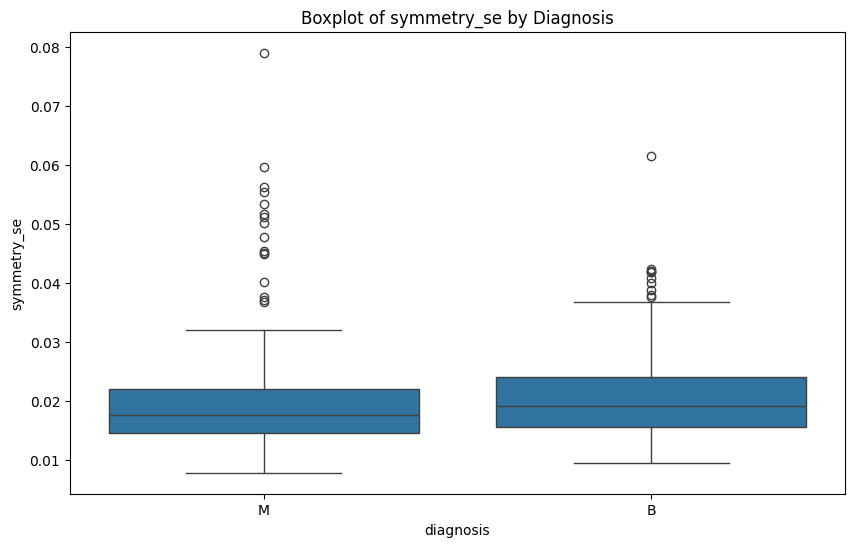

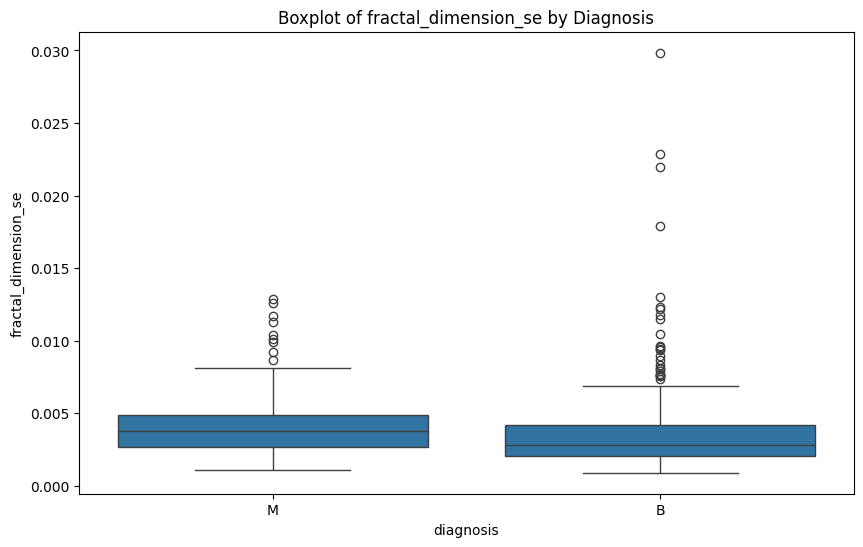

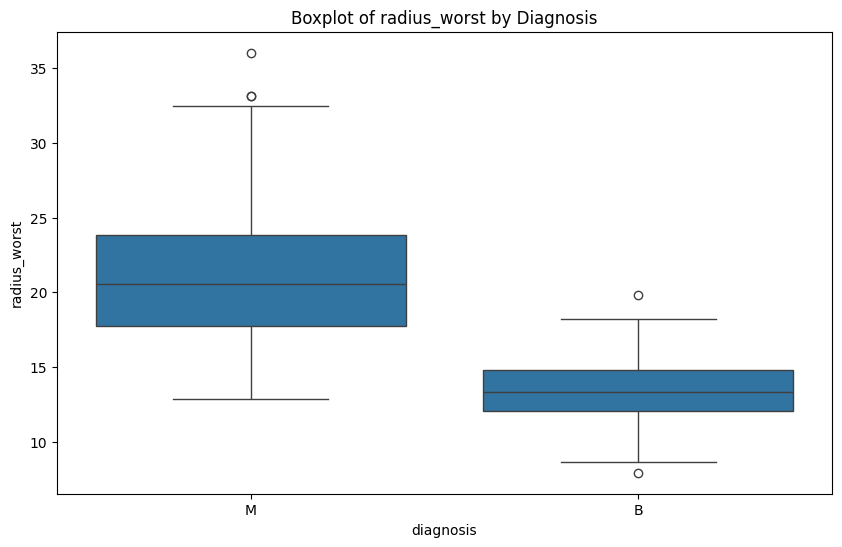

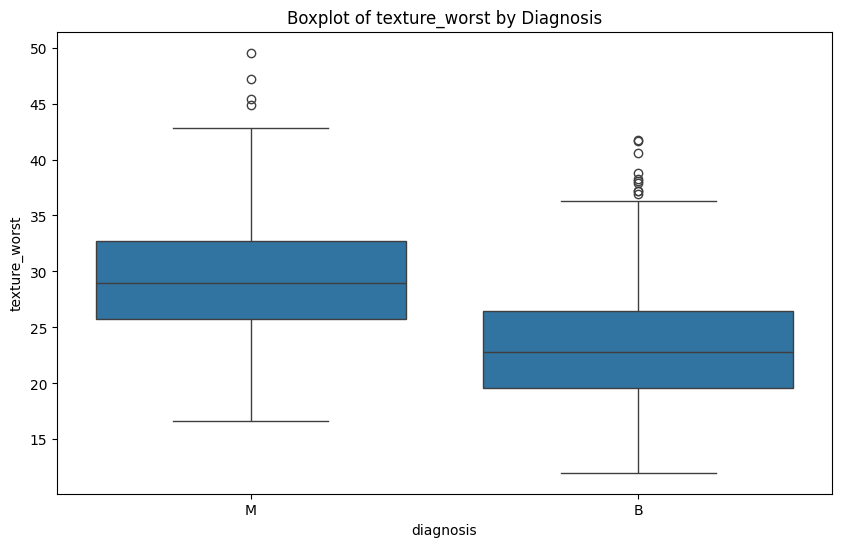

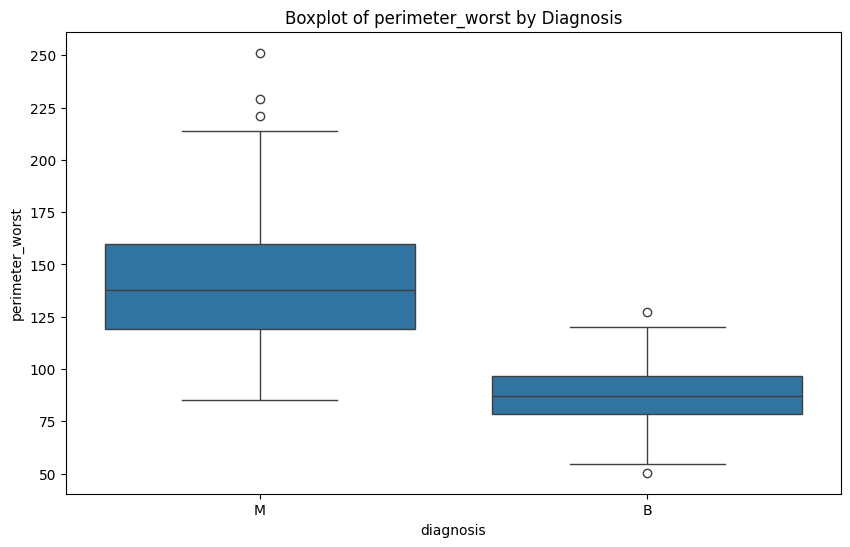

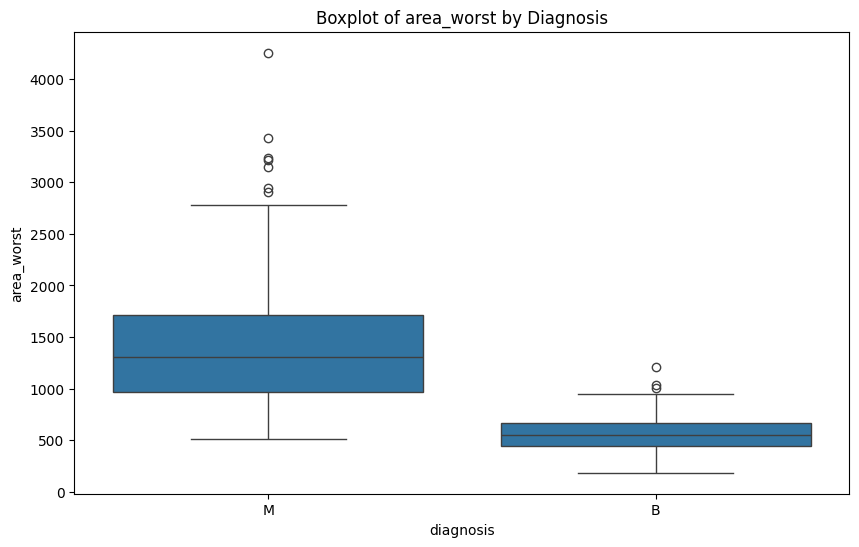

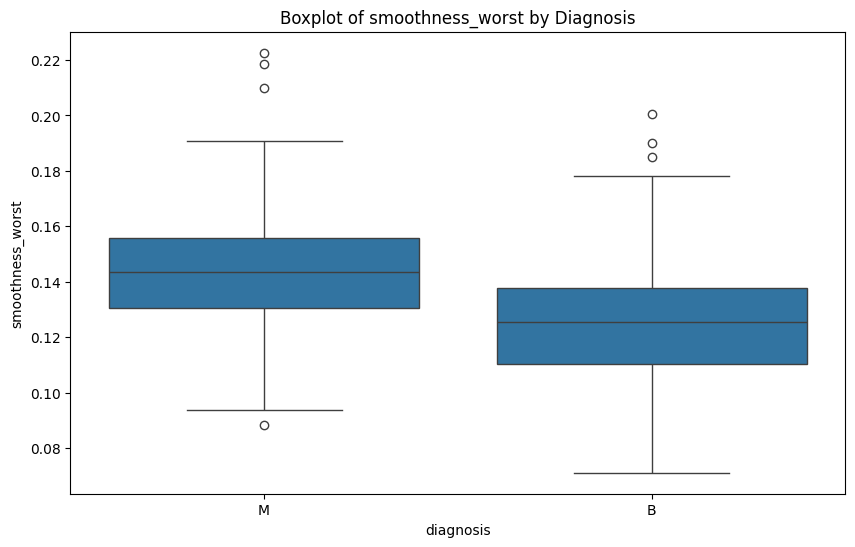

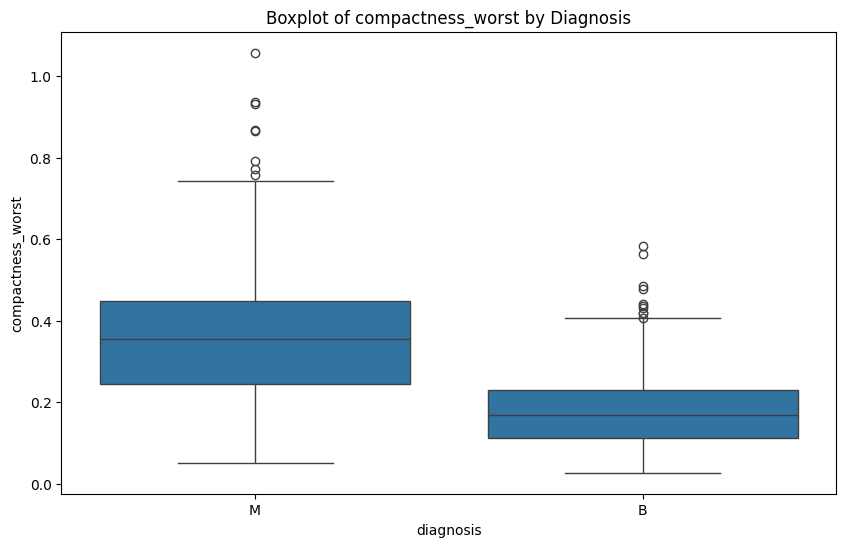

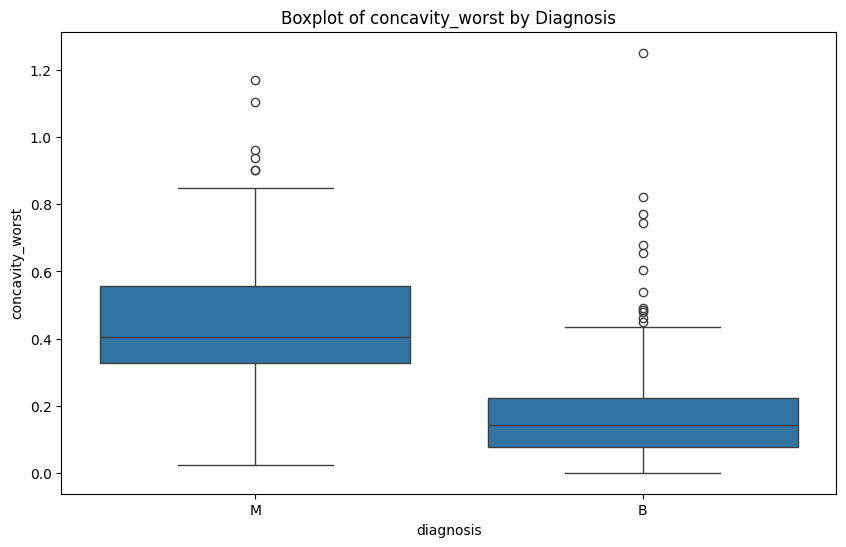

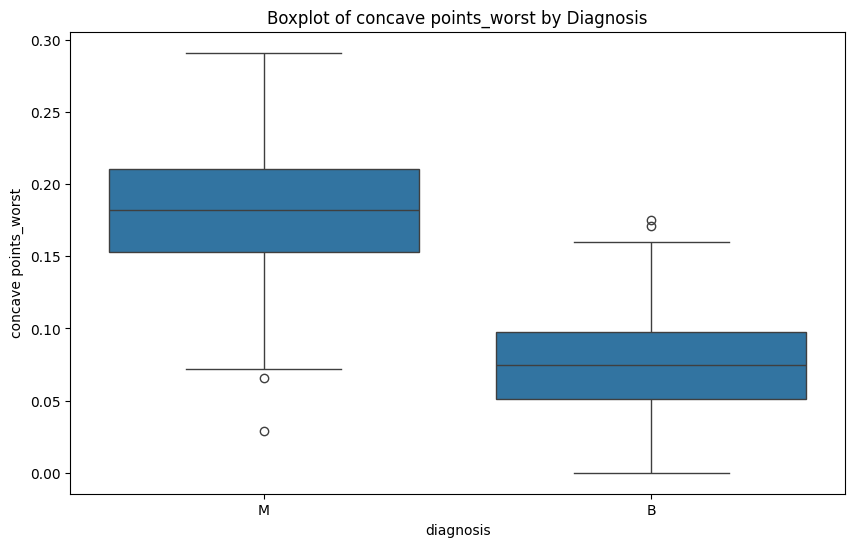

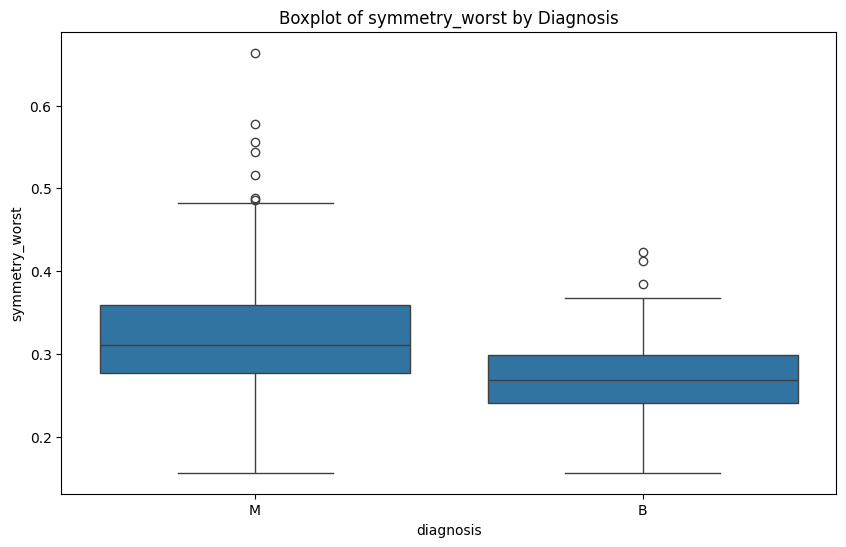

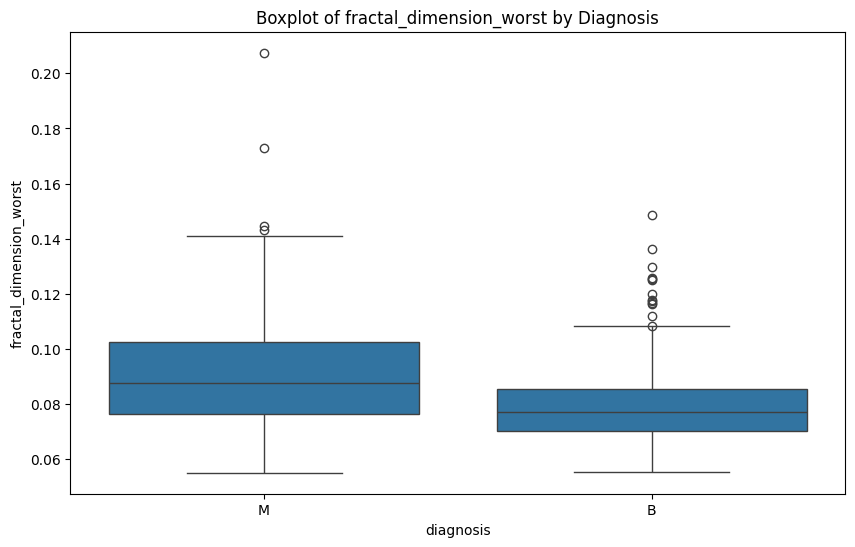

In [181]:
for feature in data.columns:
    if feature != 'diagnosis_numeric' and feature != 'diagnosis':
      plt.figure(figsize=(10, 6))
      sns.boxplot(x='diagnosis', y=feature, data=data)
      plt.title(f'Boxplot of {feature} by Diagnosis')
      plt.show()

Data Scaling

In [182]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data['diagnosis'] = data['diagnosis_numeric'].apply(lambda x: 'M' if x == 1 else 'B')

# Select the features for scaling (excluding non-numeric and target columns)
features = data.drop(columns=['diagnosis_numeric','diagnosis'])



# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Add the 'diagnosis' column back to the scaled DataFrame
scaled_data['diagnosis'] = data['diagnosis']

# Display the first few rows of the scaled data
print(scaled_data.head())


         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.236405     1.097064     -2.073335        1.269934   0.984375   
1 -0.236403     1.829821     -0.353632        1.685955   1.908708   
2  0.431741     1.579888      0.456187        1.566503   1.558884   
3  0.432121    -0.768909      0.253732       -0.592687  -0.764464   
4  0.432201     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0       2.217515  ...      -1.359293         2.303601

Scaled Data Description

In [183]:
print(scaled_data.describe())

                 id   radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean   1.248757e-17 -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std    1.000880e+00  1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.430790e-01 -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -2.361897e-01 -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.358950e-01 -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%   -1.725930e-01  4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    7.052629e+00  3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17   
std       1.000880e+00     

Exogeneous Variables

In [184]:
# Feature groups
mean_features = [col for col in data.columns if 'mean' in col]
worst_features = [col for col in data.columns if 'worst' in col]
se_features = [col for col in data.columns if 'se' in col]

data['mean_worst_features'] = data[worst_features].mean(axis=1)

# 2. Mean of Standard Error Features
data['mean_se_features'] = data[se_features].mean(axis=1)

# 3. Ratios and Differences
data['radius_ratio'] = data['radius_mean'] / data['radius_worst']
data['texture_ratio'] = data['texture_mean'] / data['texture_worst']
data['perimeter_ratio'] = data['perimeter_mean'] / data['perimeter_worst']
data['area_ratio'] = data['area_mean'] / data['area_worst']

data['radius_diff'] = data['radius_mean'] - data['radius_worst']
data['texture_diff'] = data['texture_mean'] - data['texture_worst']
data['perimeter_diff'] = data['perimeter_mean'] - data['perimeter_worst']
data['area_diff'] = data['area_mean'] - data['area_worst']


# Display the first few rows of the new dataset
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  mean_worst_features  mean_se_features  radius_ratio  t

Train and Test Set split

In [185]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'data'
# Drop the 'id' and 'diagnosis' columns, and keep 'diagnosis_numeric' as the target variable
X = data.drop(columns=['id', 'diagnosis','diagnosis_numeric'])
y = data['diagnosis_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# If you want to convert the scaled data back to DataFrames with the same column names:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print shapes to verify
print(f"Training data shape: {X_train_scaled_df.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test_scaled_df.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (455, 40), Training labels shape: (455,)
Testing data shape: (114, 40), Testing labels shape: (114,)


**Model Training and Evaluation**

Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

# Initialize and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.9824561403508771
Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=4, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Support Vector Machine (SVM)

In [188]:
from sklearn.svm import SVC

# Initialize and train the model
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm = svm_clf.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



XGBoost

In [189]:
import xgboost as xgb

# Initialize and train the model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_clf.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:44:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LightGBM

In [190]:
import lightgbm as lgb

# Initialize and train the model
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lgb = lgb_clf.predict(X_test_scaled)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("LightGBM Accuracy:", accuracy_lgb)
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6049
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

CatBoost

In [191]:
!pip install catboost
from catboost import CatBoostClassifier

# Initialize and train the model
cb_clf = CatBoostClassifier(random_state=42, verbose=0)
cb_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_cb = cb_clf.predict(X_test_scaled)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print("CatBoost Accuracy:", accuracy_cb)
print(classification_report(y_test, y_pred_cb))


CatBoost Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Neural Networks (Keras)

In [192]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# One-hot encode the labels
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

# Initialize and build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_nn, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_nn)
print(f"Neural Network Accuracy: {accuracy}")


Epoch 1/50
12/12 [==============================] - 1s 23ms/step - loss: 0.3977 - accuracy: 0.8791 - val_loss: 0.2957 - val_accuracy: 0.9011
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1945 - accuracy: 0.9560 - val_loss: 0.2049 - val_accuracy: 0.9341
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1266 - accuracy: 0.9588 - val_loss: 0.1617 - val_accuracy: 0.9341
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0946 - accuracy: 0.9698 - val_loss: 0.1384 - val_accuracy: 0.9341
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.0747 - accuracy: 0.9780 - val_loss: 0.1253 - val_accuracy: 0.9341
Epoch 6/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0624 - accuracy: 0.9890 - val_loss: 0.1178 - val_accuracy: 0.9341
Epoch 7/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0549 - accuracy: 0.9918 - val_loss: 0.1111 - val_accuracy: 0.9341
Epoch 8/50
12/12

Model Hyperparameter-Tuning

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV with the Random Forest model and the parameter grid
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score found: ", grid_search.best_score_)

# Use the best estimator found by GridSearchCV
best_rf_clf = grid_search.best_estimator_

# Predict and evaluate with the best estimator
y_pred_rf = best_rf_clf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy with Best Parameters:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score found:  0.9648351648351647
Random Forest Accuracy with Best Parameters: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Prediction Visualizations**

Confusion Matrix

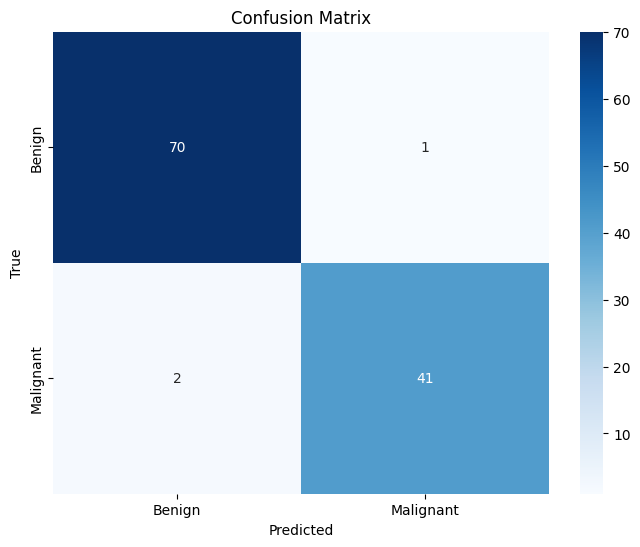

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


ROC Curve

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


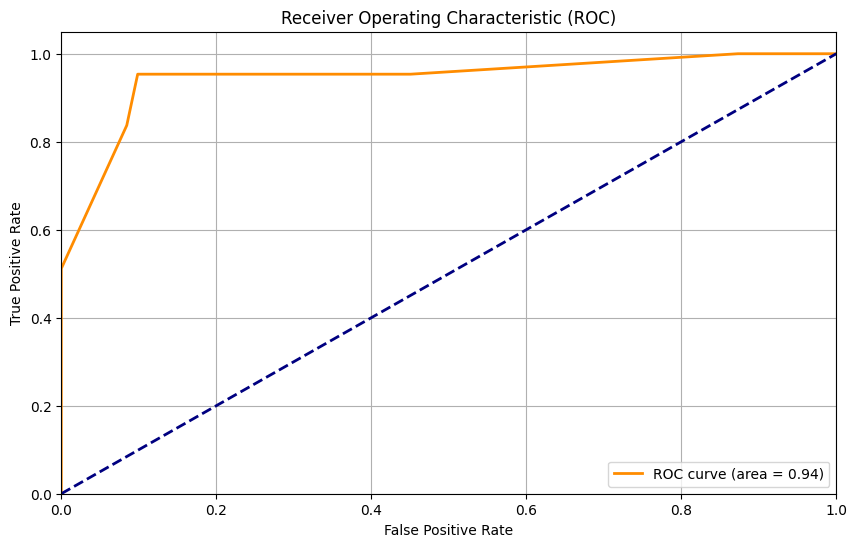

In [195]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, best_rf_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


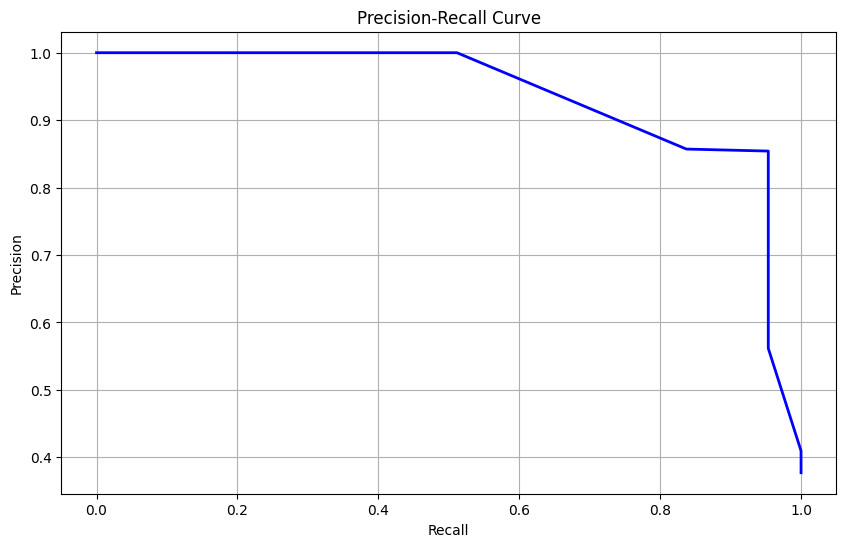

In [196]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve and area
precision, recall, _ = precision_recall_curve(y_test, best_rf_clf.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


Feature Importance

<ipython-input-197-44adfb5ebdd8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


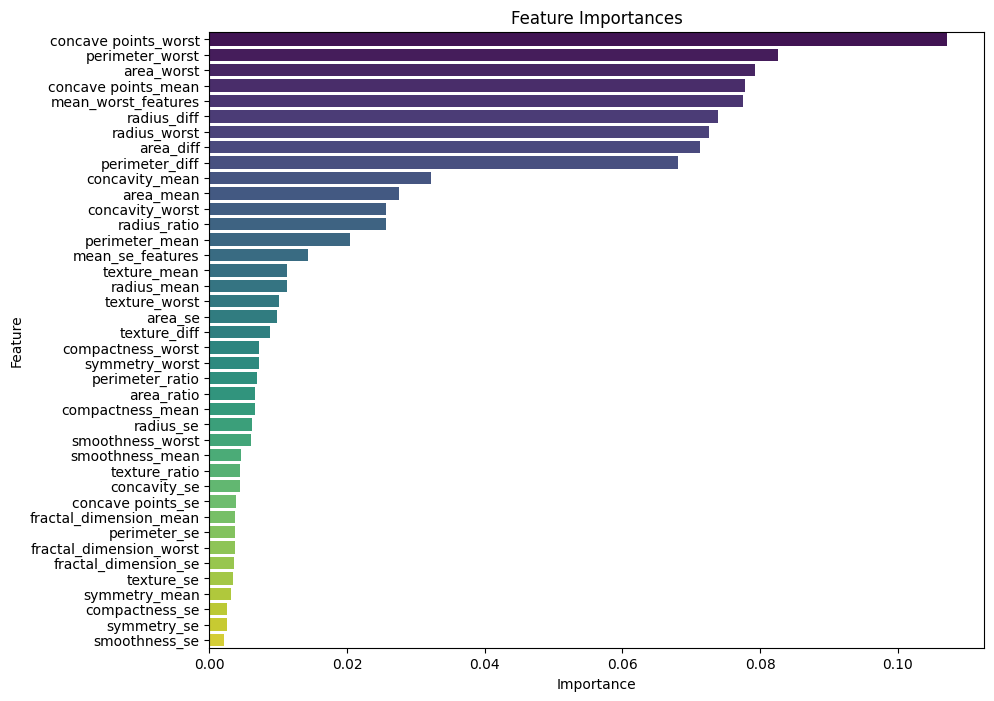

In [197]:
# Get feature importances
importances = best_rf_clf.feature_importances_
features = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()


Learning Curves

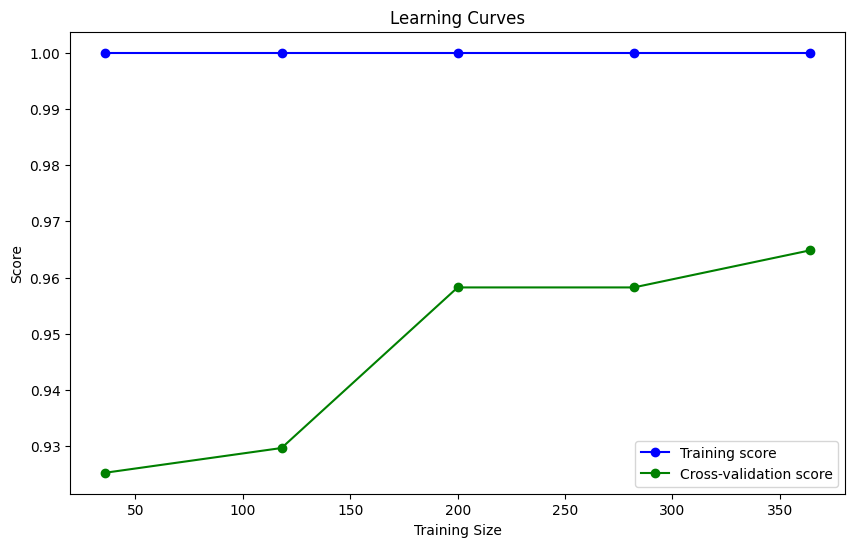

In [198]:
from sklearn.model_selection import learning_curve

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(best_rf_clf, X_train_scaled, y_train, cv=5)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='green', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()


Shapley Additive Explanations

<Figure size 1000x600 with 0 Axes>

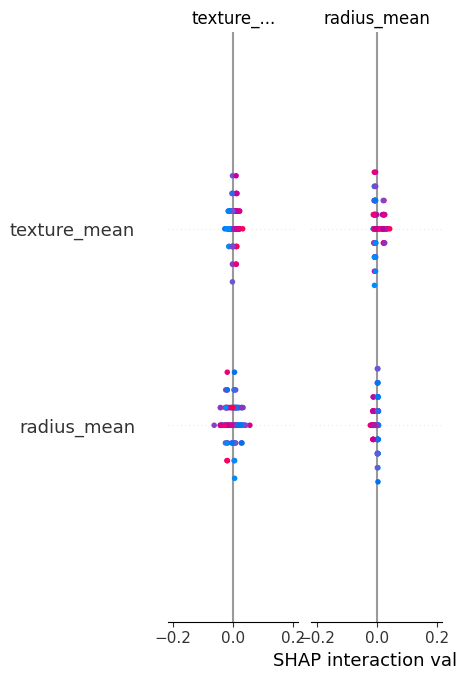

In [199]:
!pip install shap
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_rf_clf)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)
plt.show()


Cross-Validation Scores

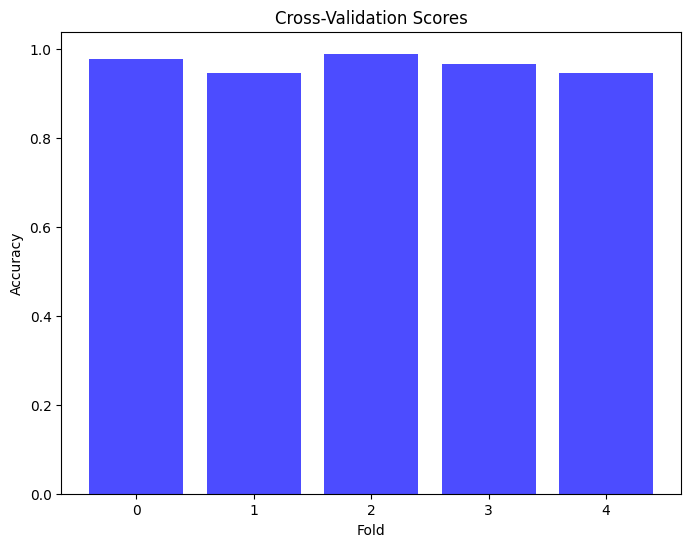

In [200]:
from sklearn.model_selection import cross_val_score

# Compute cross-validation scores
cv_scores = cross_val_score(best_rf_clf, X_train_scaled, y_train, cv=5)

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(cv_scores)), cv_scores, color='blue', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()


Residuals Plot

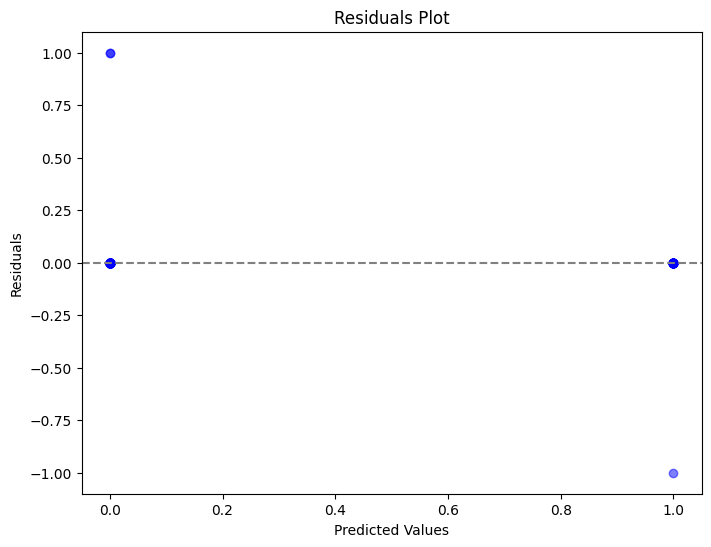

In [201]:
# Compute residuals
residuals = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5, color='blue')
plt.axhline(0, linestyle='--', color='grey')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


Model Comparison

<ipython-input-202-791938cfac11>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=model_comparison_df, palette='viridis')


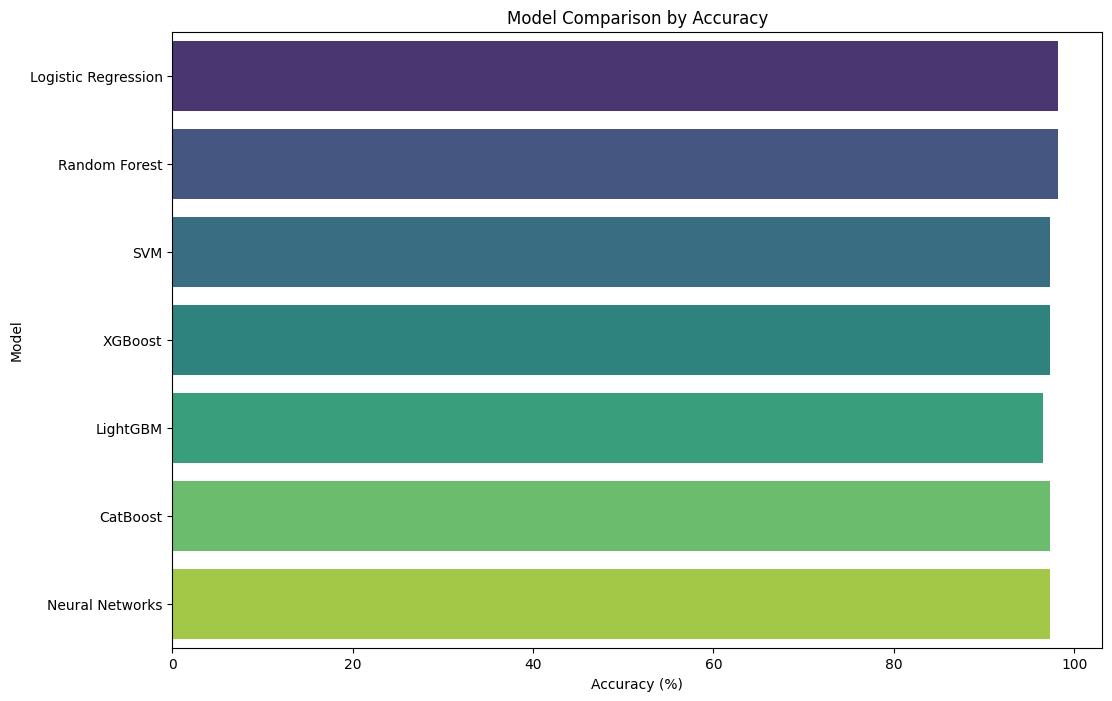

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define model names and their corresponding accuracy scores
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'LightGBM', 'CatBoost', 'Neural Networks']
accuracies = [98.2, 98.2, 97.3, 97.3, 96.49, 97.3, 97.3]

# Create a DataFrame for plotting
import pandas as pd
model_comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model', data=model_comparison_df, palette='viridis')
plt.xlabel('Accuracy (%)')
plt.title('Model Comparison by Accuracy')
plt.show()
